# Estimation of overdamped model
First download the data and load the trajectories. Don't forget to adapt the location of the file

In [16]:
import numpy as np
import folie as fl

data = fl.Trajectories(dt=1.0e-3)
n=1 # Let's use the first molecule.
trj = np.loadtxt(f"../../examples/datasets/example_2d.trj")
data.append(trj.reshape(-1,1))
print(data) #Let's check what we have

Trajectory of length 700000 and dimension 1.



Then define a model, here we are going to use the default 1D overdamped model. We can then fit the model. To start we use a simple KramersMoyal estimation

In [17]:
domain = fl.MeshedDomain.create_from_range(np.linspace(data.stats.min , data.stats.max , 10).ravel())
model = fl.models.OverdampedSplines1D(domain=domain)
estimator = fl.KramersMoyalEstimator(model)
model = estimator.fit_fetch(data)

We can then plot the force and diffusion profile

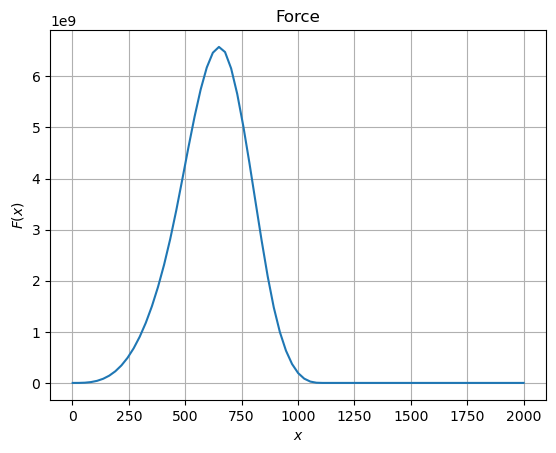

In [18]:
import matplotlib.pyplot as plt

xfa = np.linspace(np.min(trj),np.max(trj),75)
fig, ax = plt.subplots(1, 1)
# Force plot
ax.set_title("Force")
ax.set_xlabel("$x$")
ax.set_ylabel("$F(x)$")
ax.grid()
ax.plot(xfa, model.force(xfa.reshape(-1, 1)))


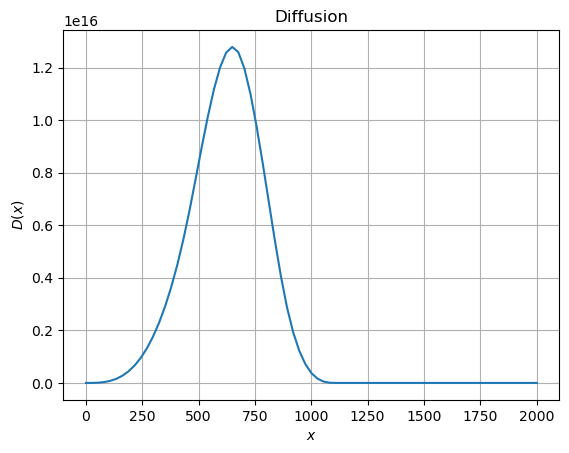

In [14]:
fig, ax = plt.subplots(1, 1)
# Diffusion plot
ax.set_title("Diffusion")
ax.grid()
ax.set_xlabel("$x$")
ax.set_ylabel("$D(x)$")
ax.plot(xfa, model.diffusion(xfa.reshape(-1, 1)))

But also obtain the free energy profile

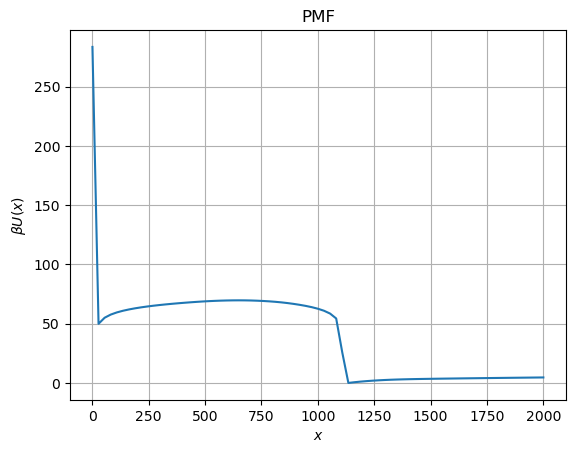

In [15]:
pmf=fl.analysis.free_energy_profile_1d(model, xfa)
fig, ax = plt.subplots(1, 1)
# Diffusion plot
ax.set_title("PMF")
ax.grid()
ax.set_xlabel("$x$")
ax.set_ylabel("$\\beta U(x)$")
ax.plot(xfa, pmf)